In [ ]:
import pandas as pd
df = pd.read_csv('/content/2_Sampled_User_Engagement_Metrics_250k.csv')
import inflect
pd.set_option('display.max_columns', None)

# Create an inflect engine
p = inflect.engine()

In [ ]:
df.head()
df.dtypes

,0
Article,object
Date,object
Heading,object
NewsType,object
Access_Timestamp,object
Exit_Timestamp,object
Device,object
Subscribed_To_Notifications,object
Opted_Into_Email,object
App_Installed,object


In [ ]:
# Make every letter lowercase in Article and Heading Columns

df[['Article', 'Heading']] = df[['Article', 'Heading']].apply(lambda x: x.str.lower())


In [ ]:
df.head(1)

,Article,Date,Heading,NewsType,Access_Timestamp,Exit_Timestamp,Device,Subscribed_To_Notifications,Opted_Into_Email,App_Installed,Referring_Website,Clicks,Shares,Comments,Reactions,Scroll_Depth,Video_Views,Image_Interactions,Follow_Up_Actions,Bounce_Rate,Form_Submissions,Engagement_Score,Time_Spent,Follows_On_Social_Media,User_Age,Region,State,Country,View_Mode,Breaking_News,Clicked_Recommended_Article,Bookmarked_Articles,Font_Size,Author,Recency,Frequency,Loading_Speed,Number_of_Ads,Number_of_Popups,Listened_to_Audio,Battery_Life,Reached_Bottom_of_Article,Number_of_Images,Active_Tabs_While_Reading
0,strong>Serena Williams overcame a sluggish sta...,3/19/2016,Serena battles past Radwanska to reach Indian...,sports,2023-04-07 02:09:10,8/29/15 0:44,mobile,Yes,Yes,Yes,Facebook,3.0,2.0,3.0,-2.0,0.67,1.0,2.0,No,0.0,Yes,10.0,16.0,Yes,32.0,United States,Ohio,United States,Light Mode,No,Yes,29.0,17.0,Chris Lee,124.0,33.0,3.77,3.0,5.0,Yes,75.0,No,6.0,13.0


In [ ]:
# Remove html
import re
def remove_tags(string):
    result = re.sub('<.*?>','','strong>',string)
    return result
import pandas as pd

# Example: Remove special characters from the 'Heading' column
df['Heading'] = df['Heading'].str.replace(r'[^\w\s]', '', regex=True)
df['Article'] = df['Article'].str.replace(r'[^\w\s]', '', regex=True)
df['Article'] = df['Article'].str.replace(r'<strong>|</strong>|strong', '', regex=True)

# Remove all punctuation except for periods at the end of sentences
df['Heading'] = df['Heading'].str.replace(r'[^\w\s.]', '', regex=True)
df['Article'] = df['Article'].str.replace(r'[^\w\s.]', '', regex=True)


df.head(1)

,Article,Date,Heading,NewsType,Access_Timestamp,Exit_Timestamp,Device,Subscribed_To_Notifications,Opted_Into_Email,App_Installed,...,Recency,Frequency,Loading_Speed,Number_of_Ads,Number_of_Popups,Listened_to_Audio,Battery_Life,Reached_Bottom_of_Article,Number_of_Images,Active_Tabs_While_Reading
0,serena williams overcame a sluggish start to f...,3/19/2016,serena battles past radwanska to reach indian...,sports,2023-04-07 02:09:10,8/29/15 0:44,mobile,Yes,Yes,Yes,...,124.0,33.0,3.77,3.0,5.0,Yes,75.0,No,6.0,13.0


In [ ]:
# Convert digits to words
# !pip install num2words
# from num2words import num2words

# Apply the function, converting numbers to words and handling non-string values
df['Heading'] = df['Heading'].apply(lambda x: ' '.join([num2words(word) if word.isdigit() else word for word in str(x).split()]))

# df['Heading'] = df['Heading'].apply(lambda x: ' '.join([p.number_to_words(word) if word.isdigit() else word for word in x.split()]))


tokens  are independent and minimal textual components that have some definite syntax and semantics.
A paragraph of text or a text document has several components including
sentences that can be further broken down into clauses, phrases, and words.

The most popular tokenization techniques include sentence and word tokenization, which are used to break down a text corpus into sentences, and each sentence into words.

Thus, tokenization can be defined as the process of breaking down or splitting textual data into smaller meaningful components called tokens.

In [ ]:
df['Heading'] = df['Heading'].fillna('').astype(str)
df['Article'] = df['Article'].fillna('').astype(str)

In [ ]:
df['Article'] = df['Article'].apply(lambda x: x.split())


In [ ]:
df['Heading'] = df['Heading'].apply(lambda x: x.split())


In [ ]:
df.head(5)

,Article,Date,Heading,NewsType,Access_Timestamp,Exit_Timestamp,Device,Subscribed_To_Notifications,Opted_Into_Email,App_Installed,...,Recency,Frequency,Loading_Speed,Number_of_Ads,Number_of_Popups,Listened_to_Audio,Battery_Life,Reached_Bottom_of_Article,Number_of_Images,Active_Tabs_While_Reading
0,"[serena, williams, overcame, a, sluggish, star...",3/19/2016,"[serena, battles, past, radwanska, to, reach, ...",sports,2023-04-07 02:09:10,8/29/15 0:44,mobile,Yes,Yes,Yes,...,124.0,33.0,3.77,3.0,5.0,Yes,75.0,No,6.0,13.0
1,"[sydney, india, badminton, ace, saina, nehwal,...",6/12/16,"[indias, nehwal, clinches, australian, open, b...",sports,2023-12-06 05:33:45,3/1/15 10:39,mobile,Yes,Yes,Yes,...,305.0,50.0,1.67,1.0,2.0,No,74.0,Yes,8.0,2.0
2,"[nagpur, south, africa, will, play, fridayâs, ...",3/22/16,"[south, africas, duminy, ruled, out, of, windi...",sports,2023-07-06 11:27:20,10/20/15 5:28,mobile,No,Yes,No,...,72.0,49.0,1.96,7.0,5.0,No,3.0,No,5.0,4.0
3,"[sydney, a, revamp, of, home, international, s...",4/6/16,"[australia, to, add, pink, ball, against, paki...",sports,2024-08-14 08:57:14,2015-12-23 07:36:07,desktop,No,Yes,No,...,8.0,45.0,2.68,3.0,1.0,Yes,82.0,Yes,8.0,10.0
4,"[karachi, former, pakistan, skipper, waseem, a...",3/5/16,"[in, case, of, security, risk, pakistan, shoul...",sports,2024-08-13 17:21:06,2/28/15 14:18,desktop,Yes,No,No,...,306.0,15.0,3.23,7.0,2.0,Yes,24.0,No,7.0,12.0


In [ ]:
# Join tokens into a single string before applying sentiment analysis


import nltk

# Download the VADER lexicon

nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis
df['Heading_Sentiment'] = df['Heading'].apply(lambda x: sia.polarity_scores(" ".join(x))['compound'])

# Display the DataFrame
df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Article,Date,Heading,NewsType,Access_Timestamp,Exit_Timestamp,Device,Subscribed_To_Notifications,Opted_Into_Email,App_Installed,...,Frequency,Loading_Speed,Number_of_Ads,Number_of_Popups,Listened_to_Audio,Battery_Life,Reached_Bottom_of_Article,Number_of_Images,Active_Tabs_While_Reading,Heading_Sentiment
0,"[serena, williams, overcame, a, sluggish, star...",3/19/2016,"[serena, battles, past, radwanska, to, reach, ...",sports,2023-04-07 02:09:10,8/29/15 0:44,mobile,Yes,Yes,Yes,...,33.0,3.77,3.0,5.0,Yes,75.0,No,6.0,13.0,-0.1280
1,"[sydney, india, badminton, ace, saina, nehwal,...",6/12/16,"[indias, nehwal, clinches, australian, open, b...",sports,2023-12-06 05:33:45,3/1/15 10:39,mobile,Yes,Yes,Yes,...,50.0,1.67,1.0,2.0,No,74.0,Yes,8.0,2.0,0.0000
2,"[nagpur, south, africa, will, play, fridayâs, ...",3/22/16,"[south, africas, duminy, ruled, out, of, windi...",sports,2023-07-06 11:27:20,10/20/15 5:28,mobile,No,Yes,No,...,49.0,1.96,7.0,5.0,No,3.0,No,5.0,4.0,0.0000
3,"[sydney, a, revamp, of, home, international, s...",4/6/16,"[australia, to, add, pink, ball, against, paki...",sports,2024-08-14 08:57:14,2015-12-23 07:36:07,desktop,No,Yes,No,...,45.0,2.68,3.0,1.0,Yes,82.0,Yes,8.0,10.0,0.0000
4,"[karachi, former, pakistan, skipper, waseem, a...",3/5/16,"[in, case, of, security, risk, pakistan, shoul...",sports,2024-08-13 17:21:06,2/28/15 14:18,desktop,Yes,No,No,...,15.0,3.23,7.0,2.0,Yes,24.0,No,7.0,12.0,0.0772


In [ ]:
# Filter the DataFrame where NewsType is 'sport'
sports_df = df[df['NewsType'] == 'sports']
business_df = df[df['NewsType'] == 'business']
# Display the filtered DataFrame
sports_df


,Article,Date,Heading,NewsType,Access_Timestamp,Exit_Timestamp,Device,Subscribed_To_Notifications,Opted_Into_Email,App_Installed,...,Frequency,Loading_Speed,Number_of_Ads,Number_of_Popups,Listened_to_Audio,Battery_Life,Reached_Bottom_of_Article,Number_of_Images,Active_Tabs_While_Reading,Heading_Sentiment
0,"[serena, williams, overcame, a, sluggish, star...",3/19/2016,"[serena, battles, past, radwanska, to, reach, ...",sports,2023-04-07 02:09:10,8/29/15 0:44,mobile,Yes,Yes,Yes,...,33.0,3.77,3.0,5.0,Yes,75.0,No,6.0,13.0,-0.1280
1,"[sydney, india, badminton, ace, saina, nehwal,...",6/12/16,"[indias, nehwal, clinches, australian, open, b...",sports,2023-12-06 05:33:45,3/1/15 10:39,mobile,Yes,Yes,Yes,...,50.0,1.67,1.0,2.0,No,74.0,Yes,8.0,2.0,0.0000
2,"[nagpur, south, africa, will, play, fridayâs, ...",3/22/16,"[south, africas, duminy, ruled, out, of, windi...",sports,2023-07-06 11:27:20,10/20/15 5:28,mobile,No,Yes,No,...,49.0,1.96,7.0,5.0,No,3.0,No,5.0,4.0,0.0000
4,"[karachi, former, pakistan, skipper, waseem, a...",3/5/16,"[in, case, of, security, risk, pakistan, shoul...",sports,2024-08-13 17:21:06,2/28/15 14:18,desktop,Yes,No,No,...,15.0,3.23,7.0,2.0,Yes,24.0,No,7.0,12.0,0.0772
7,"[islamabad, â, england, and, wales, cricket, b...",5/20/16,"[sri, lanka, pakistan, will, face, england, un...",sports,2023-03-15 12:12:58,6/15/15 11:50,desktop,No,No,Yes,...,29.0,0.79,1.0,4.0,Yes,76.0,Yes,6.0,7.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249981,"[dhaka, march, 21, reuters, bangladesh, have, ...",3/21/16,"[bangladesh, urge, icc, to, lift, taskin, b]",sports,2024-03-11 21:51:50,5/22/15 12:00,mobile,Yes,No,Yes,...,40.0,2.00,8.0,0.0,Yes,44.0,Yes,9.0,15.0,0.0000
249982,"[london, prospects, of, daynight, test, cricke...",7/30/16,"[daynight, test, in, england, moves, closer, w...",sports,2024-01-11 16:27:54,2015-07-26 05:56:55,mobile,No,Yes,No,...,23.0,1.04,6.0,2.0,Yes,15.0,Yes,9.0,5.0,0.0000
249983,"[wellington, australia, secured, an, easy, vic...",2/15/2016,"[australia, thrash, nz, in, first, test, by, i...",sports,2023-10-19 15:57:25,2015-02-11 02:56:57,mobile,No,No,Yes,...,26.0,1.74,5.0,0.0,No,89.0,Yes,4.0,11.0,0.0000
249986,"[real, madrid, have, no, intention, of, making...",8/1/16,"[zidane, insists, morata, is, staying, at, rea...",sports,2024-10-01 15:18:54,2015-10-27 08:07:37,mobile,No,Yes,No,...,28.0,0.50,9.0,5.0,Yes,10.0,No,5.0,15.0,0.0000


<Axes: >

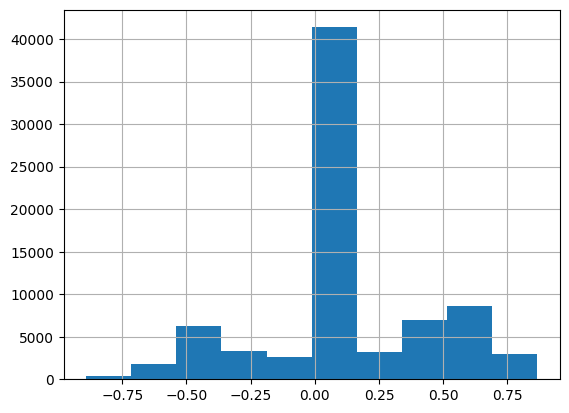

In [ ]:
sports_df['Heading_Sentiment'].hist()


<Axes: >

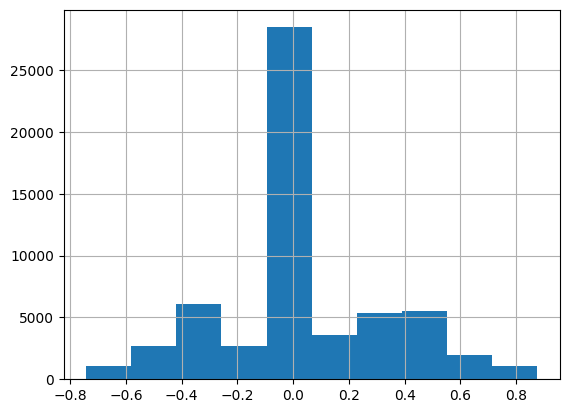

In [ ]:
business_df['Heading_Sentiment'].hist()


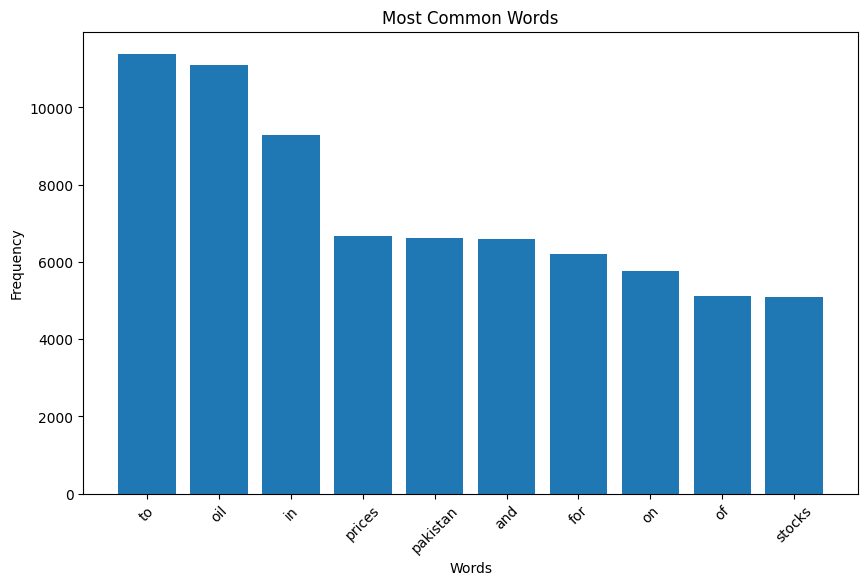

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt


# Step 1: Flatten the list of words
all_words = [word for tokens in business_df['Heading'] for word in tokens]

# Step 2: Count word frequencies
word_counts = Counter(all_words)

# Step 3: Get the most common words
most_common_words = word_counts.most_common(10)

# Step 4: Convert to a DataFrame for plotting
common_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Step 5: Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(common_df['Word'], common_df['Count'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words')
plt.xticks(rotation=45)
plt.show()

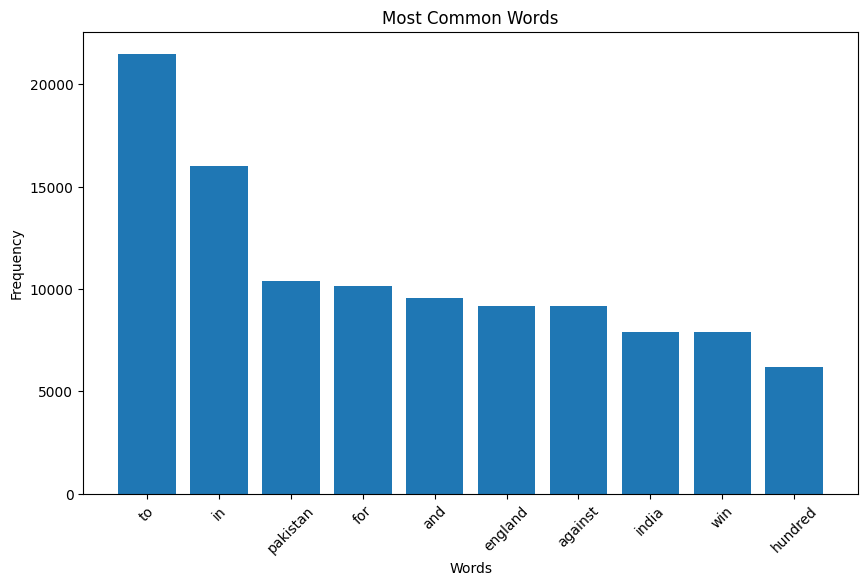

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt


# Step 1: Flatten the list of words
all_words = [word for tokens in sports_df['Heading'] for word in tokens]

# Step 2: Count word frequencies
word_counts = Counter(all_words)

# Step 3: Get the most common words
most_common_words = word_counts.most_common(10)

# Step 4: Convert to a DataFrame for plotting
common_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Step 5: Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(common_df['Word'], common_df['Count'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words')
plt.xticks(rotation=45)
plt.show()

<Axes: >

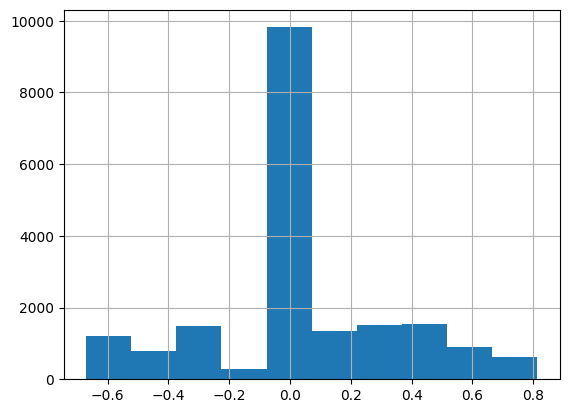

In [ ]:
MOBILE_business_df = df[(df['NewsType'] == 'business') & (df['Device'] == 'mobile')]
MOBILE_business_df['Heading_Sentiment'].hist()


<Axes: >

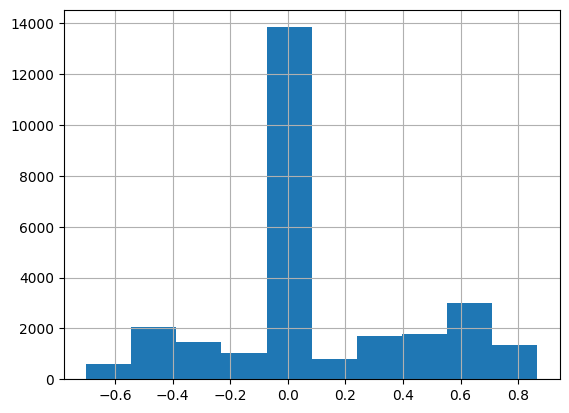

In [ ]:
MOBILE_sports_df = df[(df['NewsType'] == 'sports') & (df['Device'] == 'mobile')]
MOBILE_sports_df['Heading_Sentiment'].hist()


<Axes: >

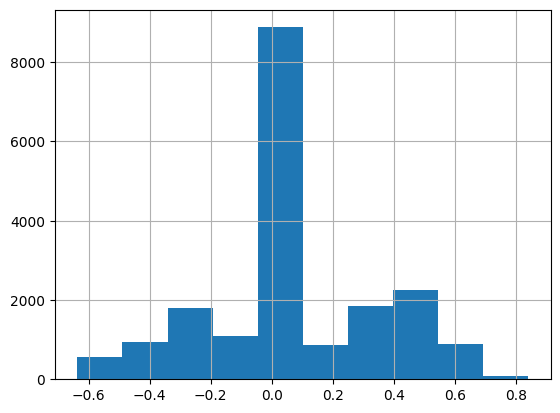

In [ ]:
DESKTOP_business_df = df[(df['NewsType'] == 'business') & (df['Device'] == 'desktop')]
DESKTOP_business_df['Heading_Sentiment'].hist()


<Axes: >

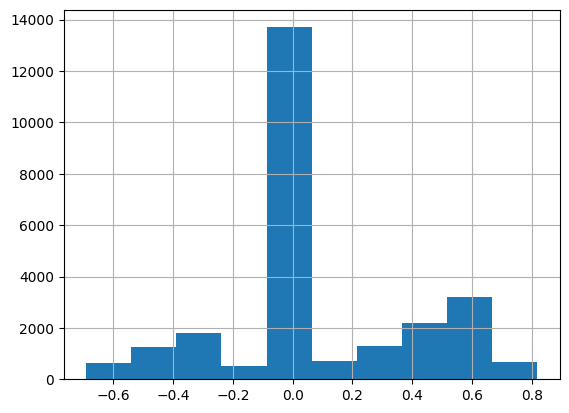

In [ ]:
DESKTOP_sports_df = df[(df['NewsType'] == 'sports') & (df['Device'] == 'desktop')]
DESKTOP_sports_df['Heading_Sentiment'].hist()


In [ ]:
df1 = df['Access_Timestamp'] = pd.to_datetime(df['Access_Timestamp'])


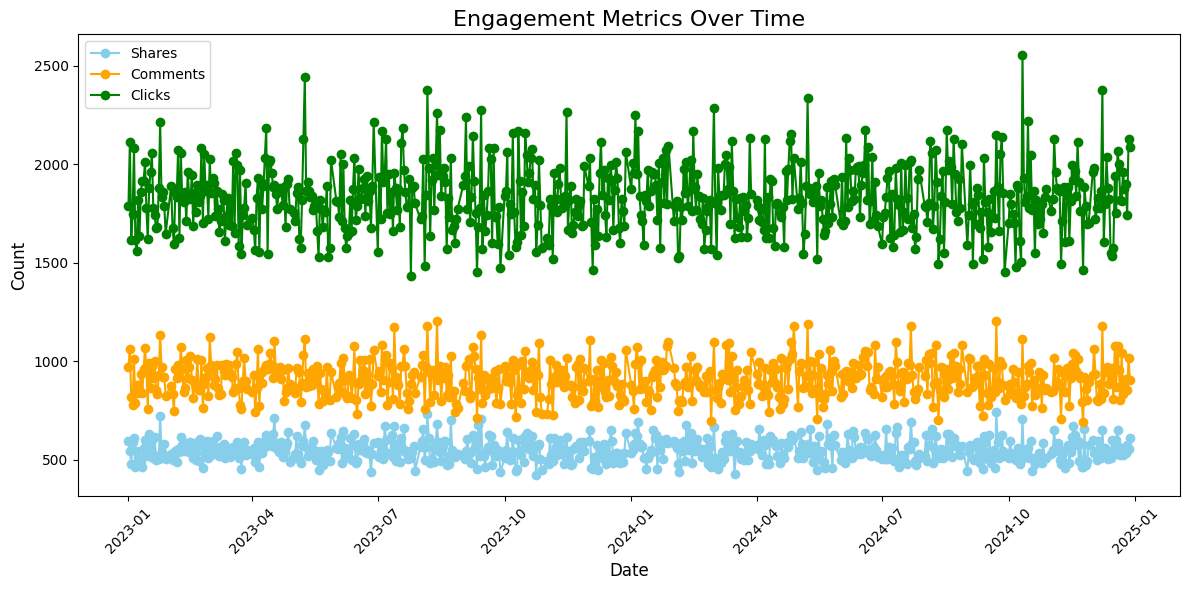

In [ ]:
df_grouped = df.groupby(df['Access_Timestamp'].dt.date).sum(numeric_only=True)

# Step 3: Plot the line chart
plt.figure(figsize=(12, 6))

# Plot each metric
plt.plot(df_grouped.index, df_grouped['Shares'], marker='o', label='Shares', color='skyblue')
plt.plot(df_grouped.index, df_grouped['Comments'], marker='o', label='Comments', color='orange')
plt.plot(df_grouped.index, df_grouped['Clicks'], marker='o', label='Clicks', color='green')

# Add titles and labels
plt.title('Engagement Metrics Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()